In [62]:
import pandas as pd
df = pd.read_excel('../dataset/FinalDataset.xlsx')

In [63]:
df.head(4)

,tags,headline,url,body,general_type,clean_body,target
0,['আমেরিকা দূর পরবাস'],নিউইয়র্কে একুশের গ্রন্থমেলা,https://www.prothomalo.com/life/durporobash/নি...,['<p>২০ ফেব্রুয়ারি বিকেল পাঁচটায় জাতিসংঘের স...,"['life', 'durporobash']",২০ ফেব্রুয়ারি বিকেল পাঁচটায় জাতিসংঘের সদর দ...,durporobash
1,"['বিবিধ', 'বিনোদন']",abc আজকের আয়োজন,https://www.prothomalo.com/entertainment/abc-আ...,['<p>তথ্য ও বিনোদন<br />প্রেমরোগ<br />কথাবন্ধু...,['entertainment'],তথ্য ও বিনোদন প্রেমরোগ কথাবন্ধু শারমীন ও লাভ ...,entertainment
2,"['বিবিধ', 'বিশাল বাংলা']",বিজ্ঞানের তিনটি বিষয়ে সম্মান কোর্স চালুর দাবি,https://www.prothomalo.com/bangladesh/বিজ্ঞানে...,"['<p>কক্সবাজার সরকারি কলেজে পদার্থ, রসায়ন ও প্...",['bangladesh'],কক্সবাজার সরকারি কলেজে পদার্থ রসায়ন ও প্রাণিব...,bangladesh
3,"['মতামত', 'চিঠিপত্র']",এমআরপি সংশোধন ফি,https://www.prothomalo.com/opinion/letter/এমআর...,['<p>বাংলাদেশে ২০০৯ সাল থেকে এমআরপি পাসপোর্ট ক...,"['opinion', 'letter']",বাংলাদেশে ২০০৯ সাল থেকে এমআরপি পাসপোর্ট কার্য...,letter


In [64]:
####### target variable anaysis ########

c:\users\mehedi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


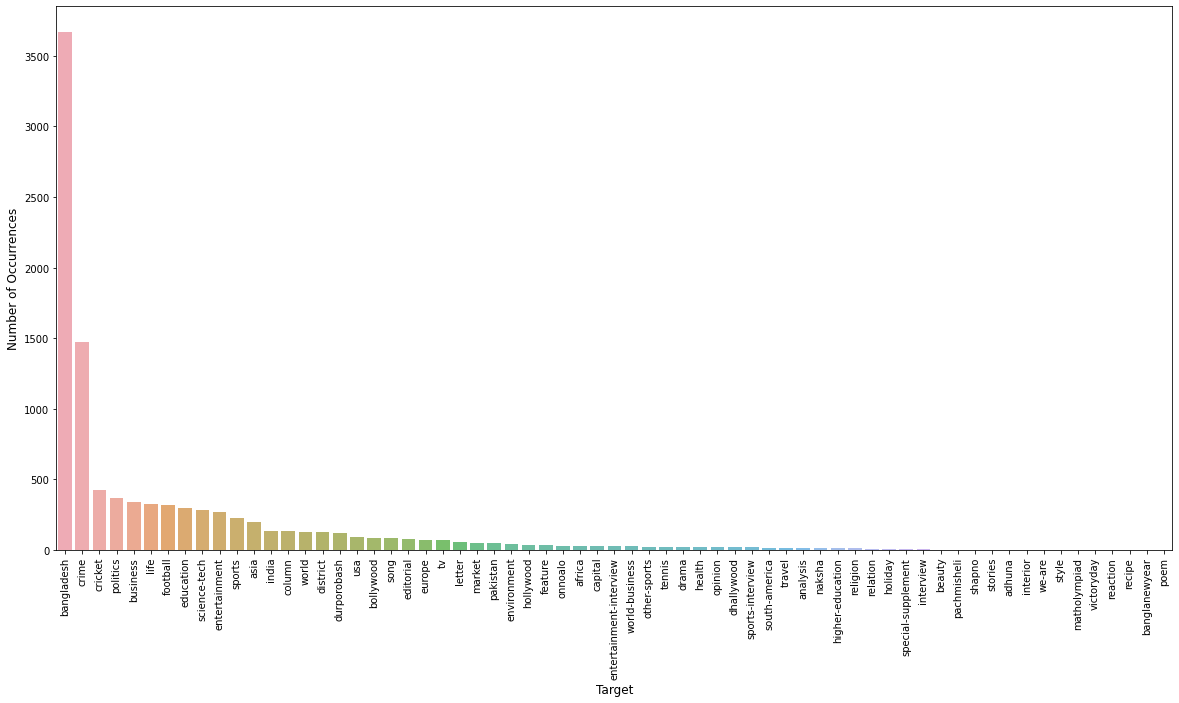

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns
target_df = df.target.value_counts() 
plt.figure(figsize=(20,10))
sns.barplot(target_df.index, target_df.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.xticks(rotation=90)
plt.savefig('Initial All Target.jpg')
plt.show()



In [66]:
taken_df = df.target.value_counts().rename_axis('Target').reset_index(name='Frequency') 

In [67]:
taken_df 

,Target,Frequency
0,bangladesh,3668
1,crime,1476
2,cricket,424
3,politics,371
4,business,343
...,...,...
60,victoryday,1
61,reaction,1
62,recipe,1
63,banglanewyear,1


In [68]:
######## find which target comes only one time ###########
taken_df = taken_df[taken_df.Frequency>100]   

In [69]:
taken_df

,Target,Frequency
0,bangladesh,3668
1,crime,1476
2,cricket,424
3,politics,371
4,business,343
5,life,324
6,football,317
7,education,296
8,science-tech,286
9,entertainment,269


c:\users\mehedi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


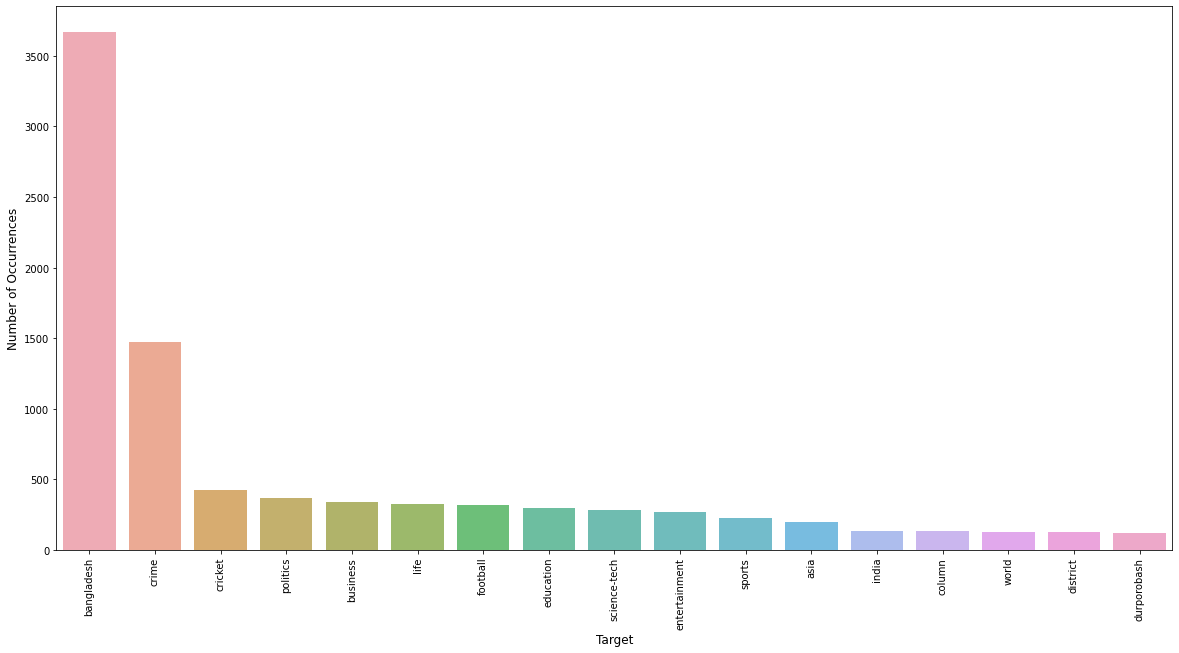

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(taken_df.Target.tolist(), taken_df.Frequency.tolist(), alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.xticks(rotation=90)
plt.savefig('Taken target though imbalanced.jpg')
plt.show()